<a href="https://colab.research.google.com/github/alswn1/Garbage-Classification/blob/main/Garbage_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **라이브러리 임포트**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## **파일 경로 설정**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/'졸업작품'/'2-2. 인공지능(재활용 분류)'

/content/drive/MyDrive/졸업작품/2-2. 인공지능(재활용 분류)


In [ ]:
train_dir = './images'
labels = ['paper', 'plastic']

In [ ]:
for label in labels:
  directory = os.path.join(train_dir, label)
  print("Images of label \"" + label + "\":\t",len(os.listdir(directory)))

Images of label "paper":	 50
Images of label "plastic":	 50


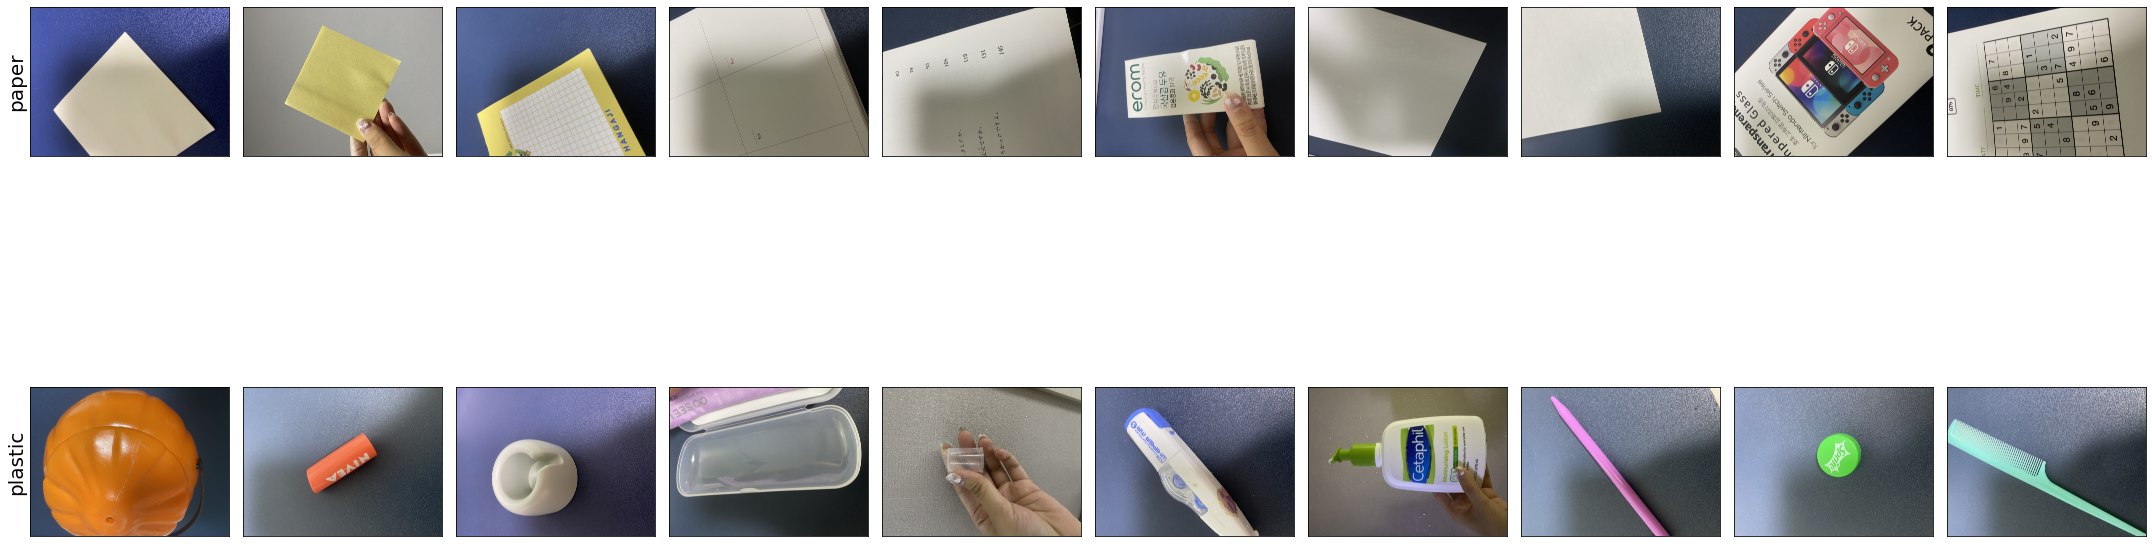

In [ ]:
plt.figure(figsize=(30,14))

for i in range(2):
  directory = os.path.join(train_dir, labels[i])
  for j in range(10):
    path = os.path.join(directory, os.listdir(directory)[j])
    img = mpimg.imread(path)

    plt.subplot(2, 10, i*10 + j + 1)
    plt.imshow(img)

    if j == 0:
      plt.ylabel(labels[i], fontsize=20)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
plt.tight_layout()
plt.show()

In [17]:
directory = os.path.join(train_dir, 'paper')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(3024, 4032, 3)

## **딥러닝**

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(3024, 4032, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),
  
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Dropout(0.2),

  
])